In [1]:
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install yfinance --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB ? eta 0:00:000:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 1.25.0 which is incompatible.
pandas-flavor 0.3.0 requires lazy-loader==0.1rc2, but you have lazy-loader 0.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 340.3 kB/s eta 0:00:00 0:00:01
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.20
    Uninstalling yfinance-0.2.20:
      Successfully uninstalled yfinance-0.2.20


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

/Users/manikshakya/anaconda3/envs/hgp/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [3]:
tickers = ['AAPL', 'WMT', 'MSFT', 'F', 'AMZN']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start="2021-01-01", end="2021-12-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


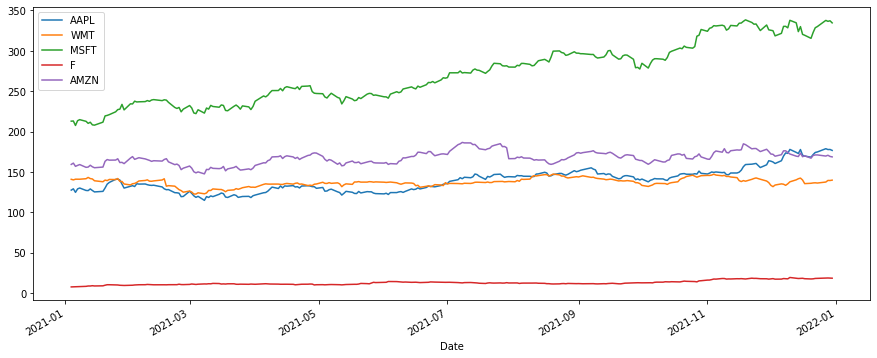

In [4]:
mydata.plot(figsize = (15,6))
plt.show()

In [5]:
mydata.iloc[0]

AAPL    127.503632
WMT     140.889221
MSFT    212.876663
F         7.627536
AMZN    159.331497
Name: 2021-01-04 00:00:00, dtype: float64

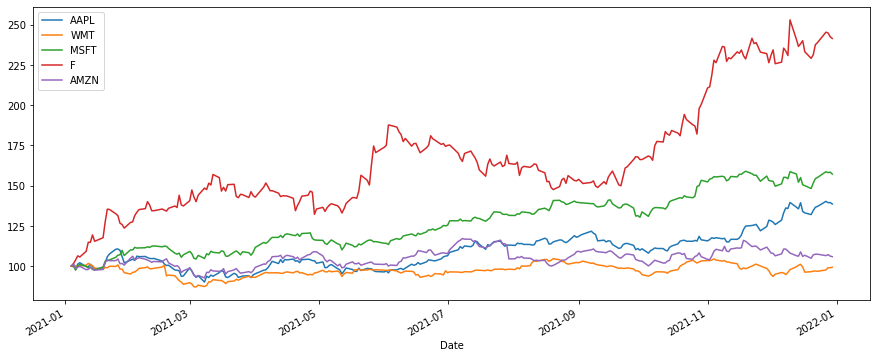

In [6]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [7]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,AAPL,WMT,MSFT,F,AMZN
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.012364,-0.005323,0.000965,0.015258,0.010004
2021-01-06,-0.033661,0.006243,-0.025929,0.021965,-0.024897
2021-01-07,0.034123,-0.000068,0.028457,0.024887,0.007577
2021-01-08,0.008631,-0.000136,0.006093,-0.006623,0.006496


In [8]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [9]:
annual_returns = returns.mean() * 250
annual_returns

AAPL    0.357299
WMT     0.006413
MSFT    0.474338
F       0.968105
AMZN    0.085512
dtype: float64

In [10]:
np.dot(annual_returns, weights)

0.37833354177091766

In [11]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print(pfolio_1)

37.833 %


In [12]:
weight_2 = np.array([0.20, 0.05, 0.15, 0.20, 0.40])

In [13]:
pfolio_2 = str(round(np.dot(annual_returns, weight_2), 5) * 100) + ' %'
print('pfolio_2 is ' + pfolio_2)
print('pfolio_1 is ' + pfolio_1)

pfolio_2 is 37.076 %
pfolio_1 is 37.833 %


In [14]:
tickers1 = ['GM', 'STLA', 'F', 'TSLA']
mydata1 = pd.DataFrame()
for t in tickers1:
    mydata1[t] = yf.download(t, start="2018-01-01", end="2021-12-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


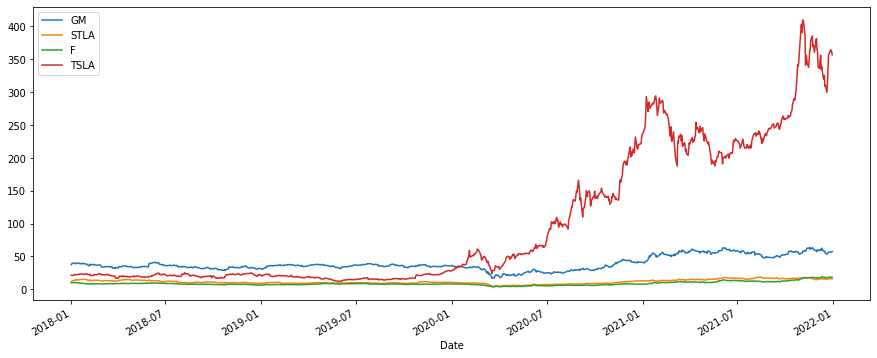

In [15]:
mydata1.plot(figsize = (15,6))
plt.show()

In [16]:
mydata1.iloc[0]

GM      37.708092
STLA    11.472710
F        9.749651
TSLA    21.368668
Name: 2018-01-02 00:00:00, dtype: float64

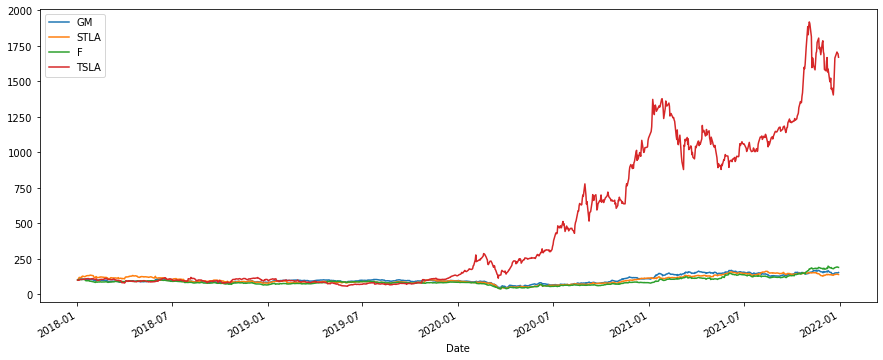

In [17]:
(mydata1 / mydata1.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [18]:
returns1 = (mydata1 / mydata1.shift(1)) - 1
returns1.head()

,GM,STLA,F,TSLA
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.024402,0.041237,0.007899,-0.010233
2018-01-04,0.030827,0.076081,0.017241,-0.008290
2018-01-05,-0.002945,0.054237,0.016949,0.006230
2018-01-08,0.004772,-0.008728,-0.003788,0.062638


In [19]:
weights1 = np.array([0.25, 0.25, 0.25, 0.25])

In [20]:
annual_returns1 = returns1.mean() * 250
annual_returns1

GM      0.189916
STLA    0.166061
F       0.237044
TSLA    0.909760
dtype: float64

In [21]:
np.dot(annual_returns1, weights1)

0.3756952270250354

In [22]:
pfolio_1_1 = str(round(np.dot(annual_returns1, weights1), 5) * 100) + ' %'
print(pfolio_1_1)

37.57 %


In [23]:
tickers2 = ['KO', 'PEP', 'KDP']
mydata2 = pd.DataFrame()
for t in tickers2:
    mydata2[t] = yf.download(t, start="2018-01-01", end="2021-12-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


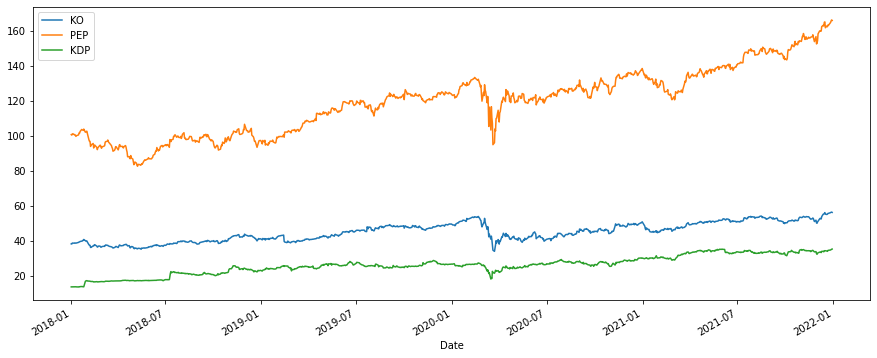

In [24]:
mydata2.plot(figsize = (15,6))
plt.show()

In [25]:
mydata2.iloc[0]

KO      38.256847
PEP    100.651840
KDP     13.683403
Name: 2018-01-02 00:00:00, dtype: float64

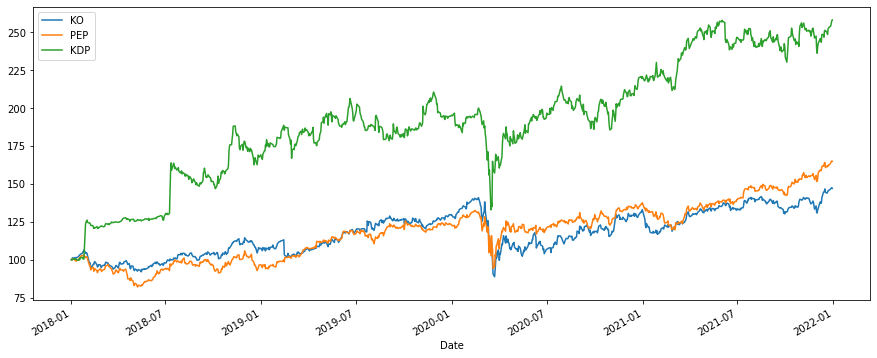

In [26]:
(mydata2 / mydata2.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [27]:
returns2 = (mydata2 / mydata2.shift(1)) - 1
returns2.head()

,KO,PEP,KDP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.002196,-0.002626,0.000525
2018-01-04,0.014084,0.004926,0.004721
2018-01-05,-0.000217,0.002873,-0.002819
2018-01-08,-0.001519,-0.005730,0.001885


In [28]:
weights2 = np.array([0.40, 0.35, 0.25])

In [29]:
annual_returns2 = returns2.mean() * 250
annual_returns2

KO     0.120001
PEP    0.150119
KDP    0.274897
dtype: float64

In [30]:
np.dot(annual_returns2, weights2)

0.16926608381471636

In [31]:
pfolio_1_2 = str(round(np.dot(annual_returns2, weights2), 5) * 100) + ' %'
print(pfolio_1_2)

16.927 %


In [32]:
tickers3 = ['QSR', 'MCD', 'WEN', 'YUM', 'SBUX']
mydata3 = pd.DataFrame()
for t in tickers3:
    mydata3[t] = yf.download(t, start="2018-01-01", end="2021-12-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


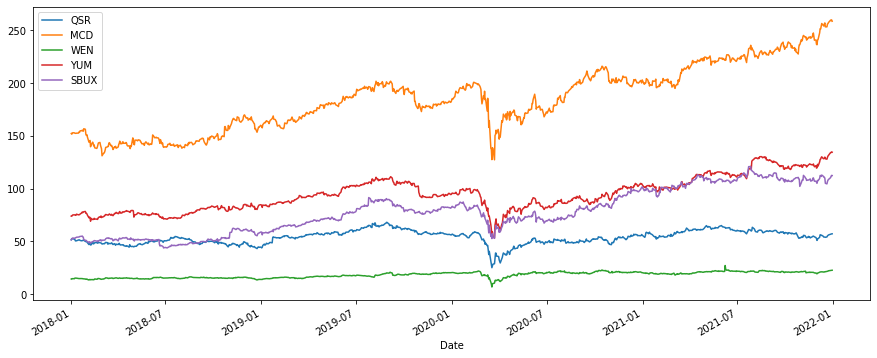

In [33]:
mydata3.plot(figsize = (15,6))
plt.show()

In [34]:
mydata3.iloc[0]

QSR      51.668972
MCD     152.204285
WEN      14.448684
YUM      73.990021
SBUX     51.534878
Name: 2018-01-02 00:00:00, dtype: float64

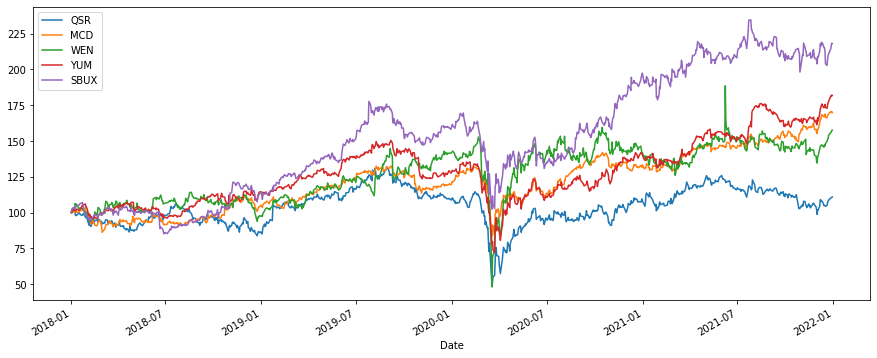

In [35]:
(mydata3 / mydata3.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In [36]:
returns3 = (mydata3 / mydata3.shift(1)) - 1
returns3.head()

,QSR,MCD,WEN,YUM,SBUX
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.019539,-0.004214,0.023284,-0.000858,0.018740
2018-01-04,0.003142,0.007015,-0.011377,0.010180,0.003747
2018-01-05,-0.005481,0.002015,0.016960,0.005828,0.011539
2018-01-08,-0.006771,-0.000689,-0.010125,0.001690,-0.005033


In [37]:
weights3 = np.array([0.27, 0.21, 0.31, 0.04, 0.17])

In [38]:
annual_returns3 = returns3.mean() * 250
annual_returns3

QSR     0.082777
MCD     0.162540
WEN     0.217906
YUM     0.183949
SBUX    0.237338
dtype: float64

In [39]:
np.dot(annual_returns3, weights3)

0.17173961427624224

In [40]:
pfolio_1_3 = str(round(np.dot(annual_returns3, weights3), 5) * 100) + ' %'
print(pfolio_1_3)

17.174 %
